In [2]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Age of the Universe

In [3]:
from scipy.integrate import quad

def compute_fa(a, w0, wa):
    fa = a**(-3 * (1 + w0 + wa)) * np.exp(-3 * wa * (1 - a))
    return fa

def compute_Hubble(a, Omega_m, Omega_r, Omega_k, Omega_l, w0, wa):
    term_m = Omega_m * a**-3
    term_r = Omega_r * a**-4
    term_k = Omega_k * a**-2
    term_l = Omega_l * compute_fa(a, w0, wa)
    Hubble = np.sqrt(term_m + term_r + term_k + term_l)
    return Hubble

def integrand_age(a, Omega_m, Omega_r, Omega_k, Omega_l, w0, wa):
    H = compute_Hubble(a, Omega_m, Omega_r, Omega_k, Omega_l, w0, wa)
    return 1 / a / H

In [4]:
h  = 0.72
H0 = 100*h # km/s/Mpc

Omega_m = 0.26
Omega_b = 0.044
Omega_r = 0.0
Omega_k = 0.0
Omega_l = 1 - Omega_m

In [5]:
age1, age_err1 = quad(integrand_age, 1e-10, 1, args=(Omega_m, Omega_r, Omega_k, Omega_l, -1.0,  0.0))
age2, age_err2 = quad(integrand_age, 1e-10, 1, args=(Omega_m, Omega_r, Omega_k, Omega_l, -1.2,  0.8))
age3, age_err3 = quad(integrand_age, 1e-10, 1, args=(Omega_m, Omega_r, Omega_k, Omega_l, -0.8, -0.8))

### Unit conversion: conformal time [$H_0^{-1}$] $\rightarrow$ physical time [Gyr]

In [6]:
Mpc_to_km = 206265 * 1.496 * 1e14
invH0_to_sec = Mpc_to_km # H0 [km/s/Mpc] --> [km/s/km] --> [1/s] --> [1/Gyr]
invH0_to_Gyr = invH0_to_sec / 3600 / 24 / 365 / 1e9

unit_t = 1/H0 * invH0_to_Gyr
unit_t

13.58995539489261

In [7]:
print("[Age of the Universe]")
print(f"LCDM (w0, wa)=(-1.0,  0.0): {age1:f} [1/H0], {age1*unit_t:f} Gyr")
print(f"CPL1 (w0, wa)=(-1.2,  0.8): {age2:f} [1/H0], {age2*unit_t:f} Gyr")
print(f"CPL2 (w0, wa)=(-0.8, -0.8): {age3:f} [1/H0], {age3*unit_t:f} Gyr")

[Age of the Universe]
LCDM (w0, wa)=(-1.0,  0.0): 1.003014 [1/H0], 13.630920 Gyr
CPL1 (w0, wa)=(-1.2,  0.8): 1.003631 [1/H0], 13.639296 Gyr
CPL2 (w0, wa)=(-0.8, -0.8): 0.999787 [1/H0], 13.587058 Gyr


# Evolutionary History

In [8]:
def func_da_dt(y, t, O_mat_0, O_vac_0, O_k_0, w0, wa):
    a = y
    dadt2 = (1/a) * \
            (O_mat_0 + \
             O_vac_0 * a**(-3 * (w0 + wa)) * np.exp(-3 * wa * (1 - a)) + \
             O_k_0 * a)
    return np.sqrt(dadt2)

def func_da_dtau0(y, t, O_mat_0, O_vac_0, O_k_0, w0, wa):
    # dt = a*dtau
    a = y
    dadtau2 = a * \
              (O_mat_0 + \
               O_vac_0 * a**(-3 * (w0 + wa)) * np.exp(-3 * wa * (1 - a)) + \
               O_k_0 * a)
    return np.sqrt(dadtau2)

def func_da_dtau1(y, t, O_mat_0, O_vac_0, O_k_0, w0, wa):
    # super comoving coordinates
    # dt = a*a dtau
    a = y
    dadtau2 = a**3 * \
              (O_mat_0 + \
               O_vac_0 * a**(-3 * (w0 + wa)) * np.exp(-3 * wa * (1 - a)) + \
               O_k_0 * a)
    return np.sqrt(dadtau2)

In [9]:
# input params
h  = 0.72
Omega_m = 0.26
Omega_l = 0.74
Omega_k = 0
w0 = -1.0
wa = 0.0
ntable = 10000

H0 = 100*h # km/s/Mpc

<IPython.core.display.Javascript object>


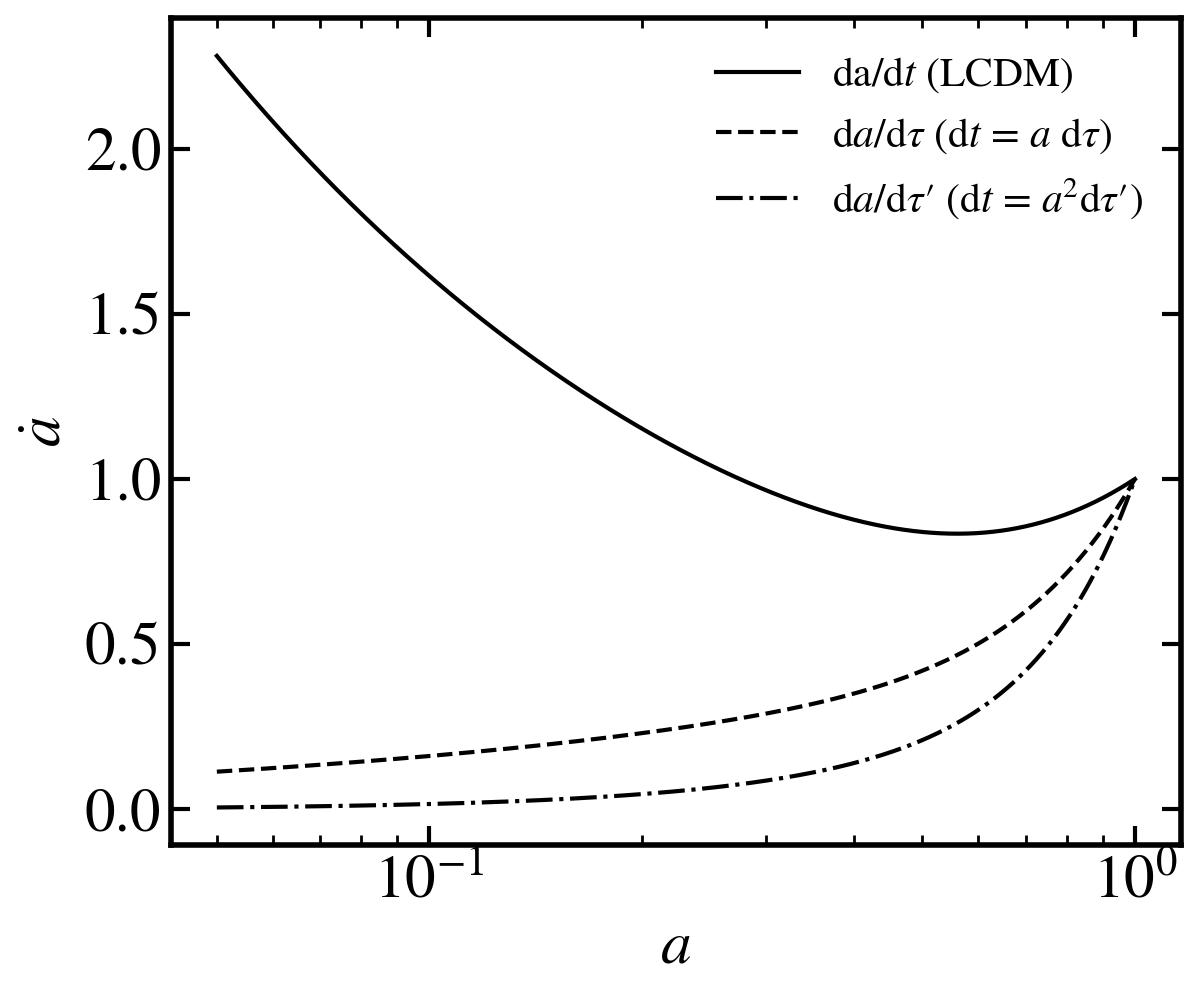

In [10]:
plt.figure(figsize=(6, 5))
amin, amax = 0.05, 1
adum = np.linspace(amin, amax, 1000)

plt.plot(adum, func_da_dt(adum, _, Omega_m, Omega_l, Omega_k, w0, wa), c='k', label="da/d$t$ (LCDM)")
plt.plot(adum, func_da_dtau0(adum, _, Omega_m, Omega_l, Omega_k, w0, wa), c='k', ls="--", label=r"d$a$/d$\tau$ (d$t$ = $a$ d$\tau$)")
plt.plot(adum, func_da_dtau1(adum, _, Omega_m, Omega_l, Omega_k, w0, wa), c='k', ls="-.", label=r"d$a$/d$\tau\prime$ (d$t$ = $a$$^2$d$\tau\prime$)")

plt.xscale('log')
plt.xlabel(r"$a$")
plt.ylabel(r"$\dot{a}$")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

<IPython.core.display.Javascript object>


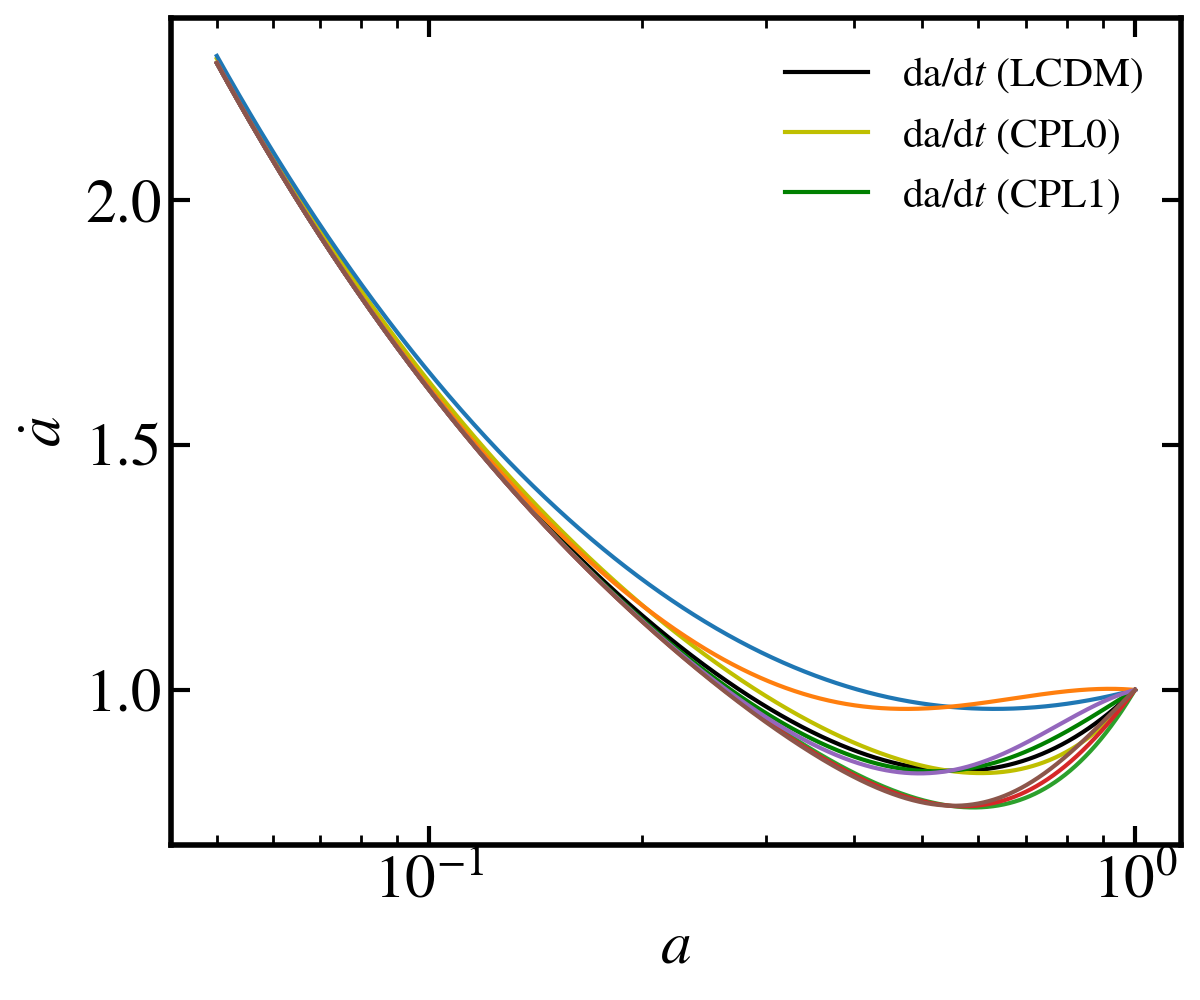

In [20]:
plt.figure(figsize=(6, 5))
amin, amax = 0.05, 1
adum = np.linspace(amin, amax, 1000)

plt.plot(adum, func_da_dt(adum, _, Omega_m, Omega_l, Omega_k, w0, wa), c='k', label="da/d$t$ (LCDM)")
plt.plot(adum, func_da_dt(adum, _, Omega_m, Omega_l, Omega_k, -1.2,  0.8), c='y', label="da/d$t$ (CPL0)")
plt.plot(adum, func_da_dt(adum, _, Omega_m, Omega_l, Omega_k, -0.8, -0.8), c='g', label="da/d$t$ (CPL1)")
plt.plot(adum, func_da_dt(adum, _, Omega_m, Omega_l, Omega_k, -0.6,  0.0))
plt.plot(adum, func_da_dt(adum, _, Omega_m, Omega_l, Omega_k, -0.4, -0.8))
plt.plot(adum, func_da_dt(adum, _, Omega_m, Omega_l, Omega_k, -1.4,  0.0))
plt.plot(adum, func_da_dt(adum, _, Omega_m, Omega_l, Omega_k, -1.2, -0.8))
plt.plot(adum, func_da_dt(adum, _, Omega_m, Omega_l, Omega_k, -0.6, -1.6))
plt.plot(adum, func_da_dt(adum, _, Omega_m, Omega_l, Omega_k, -1.0, -1.6))

# plt.plot(adum, func_da_dtau0(adum, _, Omega_m, Omega_l, Omega_k, w0, wa), c='k', ls="--", label=r"d$a$/d$\tau$ (d$t$ = $a$ d$\tau$)")
# plt.plot(adum, func_da_dtau0(adum, _, Omega_m, Omega_l, Omega_k, -1.2,  0.8), c='y', ls="--", label=r"d$a$/d$\tau$ (d$t$ = $a$ d$\tau$)")
# plt.plot(adum, func_da_dtau0(adum, _, Omega_m, Omega_l, Omega_k, -0.8, -0.8), c='g', ls="--", label=r"d$a$/d$\tau$ (d$t$ = $a$ d$\tau$)")

# plt.plot(adum, func_da_dtau1(adum, _, Omega_m, Omega_l, Omega_k, w0, wa), c='k', ls="-.", label=r"d$a$/d$\tau\prime$ (d$t$ = $a$$^2$d$\tau\prime$)")
# plt.plot(adum, func_da_dtau1(adum, _, Omega_m, Omega_l, Omega_k, -1.2,  0.8), c='y', ls="-.", label=r"d$a$/d$\tau\prime$ (d$t$ = $a$$^2$d$\tau\prime$)")
# plt.plot(adum, func_da_dtau1(adum, _, Omega_m, Omega_l, Omega_k, -0.8, -0.8), c='g', ls="-.", label=r"d$a$/d$\tau\prime$ (d$t$ = $a$$^2$d$\tau\prime$)")

plt.xscale('log')
plt.xlabel(r"$a$")
plt.ylabel(r"$\dot{a}$")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

### Generating table in linear scale?

In [11]:
# scale factor and time at present
a_fin   = 1
t_fin   = 0 # lookback time 
tau_fin = 0 # lookback time
# code unit: [1/H0]

t    = np.linspace(t_fin, -1.1, ntable)
tau0 = np.linspace(tau_fin, -5, ntable)
tau1 = np.linspace(tau_fin, -100, ntable)

at    = odeint(func_da_dt, a_fin, t, args=(Omega_m, Omega_l, Omega_k, w0, wa)).flatten()
atau0 = odeint(func_da_dtau0, a_fin, tau0, args=(Omega_m, Omega_l, Omega_k, w0, wa)).flatten()
atau1 = odeint(func_da_dtau1, a_fin, tau1, args=(Omega_m, Omega_l, Omega_k, w0, wa)).flatten()

/tmp/ipykernel_1547694/895843225.py:7: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(dadt2)
/tmp/ipykernel_1547694/895843225.py:16: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(dadtau2)


### or in logarithmic scale?

In [12]:
# scale factor and time at present
a_fin   = 1
t_fin   = 1e-8 # lookback time 
tau_fin = 1e-8 # lookback time
# code unit: [1/H0]

t    = np.logspace(np.log10(t_fin), np.log10(1.1), ntable)
tau0 = np.logspace(np.log10(tau_fin), np.log10(5), ntable)
tau1 = np.logspace(np.log10(tau_fin), np.log10(100), ntable)

at    = odeint(func_da_dt, a_fin, -t, args=(Omega_m, Omega_l, Omega_k, w0, wa)).flatten()
atau0 = odeint(func_da_dtau0, a_fin, -tau0, args=(Omega_m, Omega_l, Omega_k, w0, wa)).flatten()
atau1 = odeint(func_da_dtau1, a_fin, -tau1, args=(Omega_m, Omega_l, Omega_k, w0, wa)).flatten()

/tmp/ipykernel_1547694/895843225.py:7: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(dadt2)
/tmp/ipykernel_1547694/895843225.py:16: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(dadtau2)


# $z_{out}$ in Multiverse Nbody

In [13]:
zout_nbody = np.loadtxt("../aout/PreFoF.flag")
aout_nbody = 1/(zout_nbody+1)
zout_nbody

array([1.1490023e+01, 9.7677110e+00, 8.5375360e+00, 7.6071830e+00,
       6.8745090e+00, 6.2798150e+00, 5.7856750e+00, 5.3673360e+00,
       5.0077160e+00, 4.6946140e+00, 4.4190630e+00, 4.1743130e+00,
       3.9551750e+00, 3.7575910e+00, 3.5783390e+00, 3.4148210e+00,
       3.2649220e+00, 3.1268980e+00, 2.9992970e+00, 2.8809010e+00,
       2.7706800e+00, 2.6677560e+00, 2.5713740e+00, 2.4808840e+00,
       2.3957200e+00, 2.3153890e+00, 2.2394590e+00, 2.1675490e+00,
       2.0993210e+00, 2.0344760e+00, 1.9727460e+00, 1.9138940e+00,
       1.8577030e+00, 1.8039820e+00, 1.7525550e+00, 1.7032660e+00,
       1.6559700e+00, 1.6105370e+00, 1.5668480e+00, 1.5247940e+00,
       1.4842750e+00, 1.4452010e+00, 1.4074860e+00, 1.3710540e+00,
       1.3358310e+00, 1.3017530e+00, 1.2687580e+00, 1.2367890e+00,
       1.2057930e+00, 1.1757200e+00, 1.1465260e+00, 1.1181670e+00,
       1.0906030e+00, 1.0637960e+00, 1.0377130e+00, 1.0123200e+00,
       9.8758600e-01, 9.6348200e-01, 9.3998100e-01, 9.1705800e

<IPython.core.display.Javascript object>


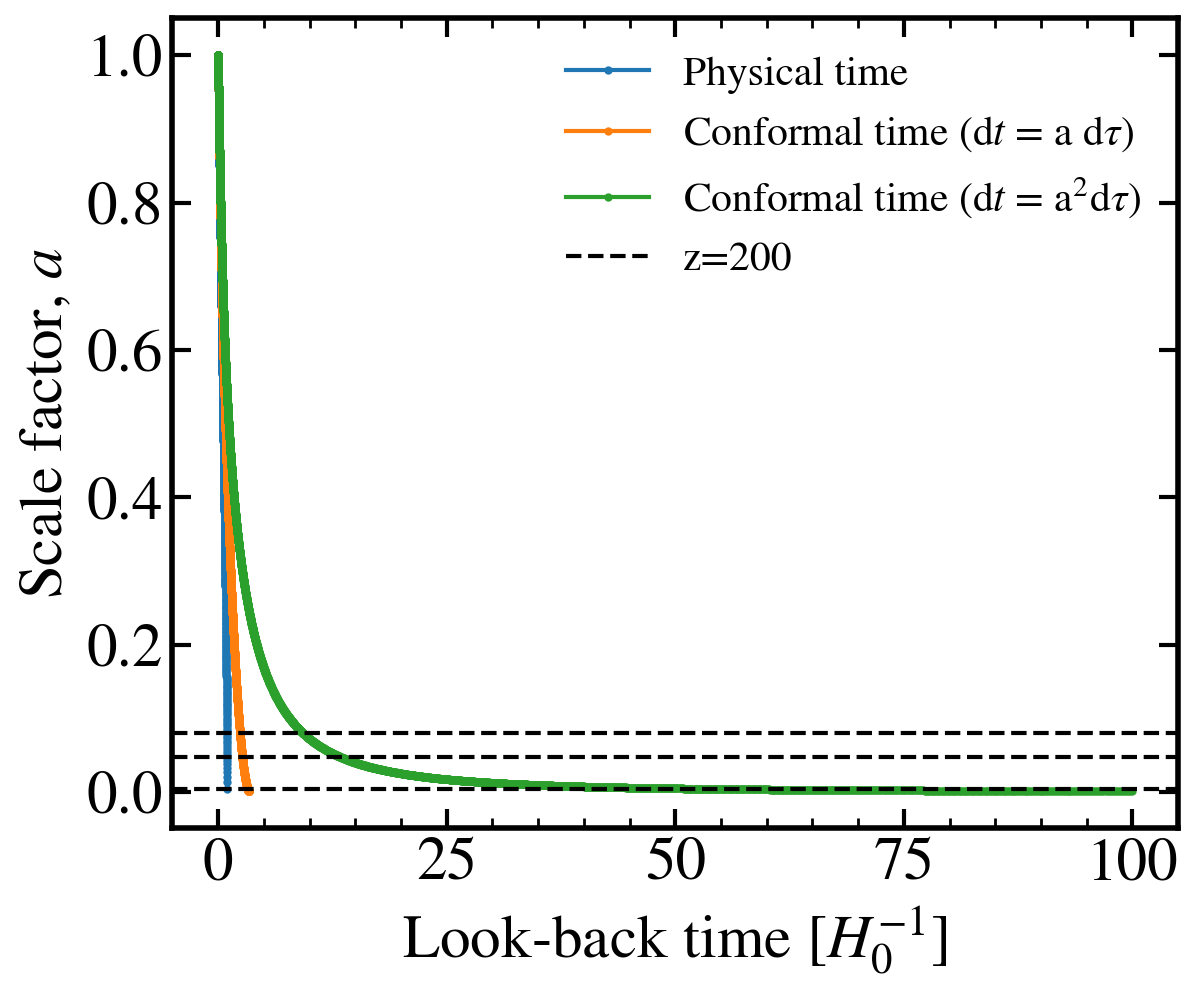

In [14]:
plt.figure(figsize=(6, 5))
plt.plot(t, at, "o-", ms=2, label=r"Physical time ")
plt.plot(tau0, atau0, "o-", ms=2, label=r"Conformal time (d$t$ = a d$\tau$)")
plt.plot(tau1, atau1, "o-", ms=2, label=r"Conformal time (d$t$ = a$^2$d$\tau$)")

plt.axhline(1/201, ls="--", c='k', label="z=200")
plt.axhline(1/12.5, ls="--", c='k')#, label="z=200")
plt.axhline(1/21, ls="--", c='k')#, label="z=200")
    
plt.xlabel(r"Look-back time [$H_0^{-1}$]")
plt.ylabel("Scale factor, $a$")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

<IPython.core.display.Javascript object>


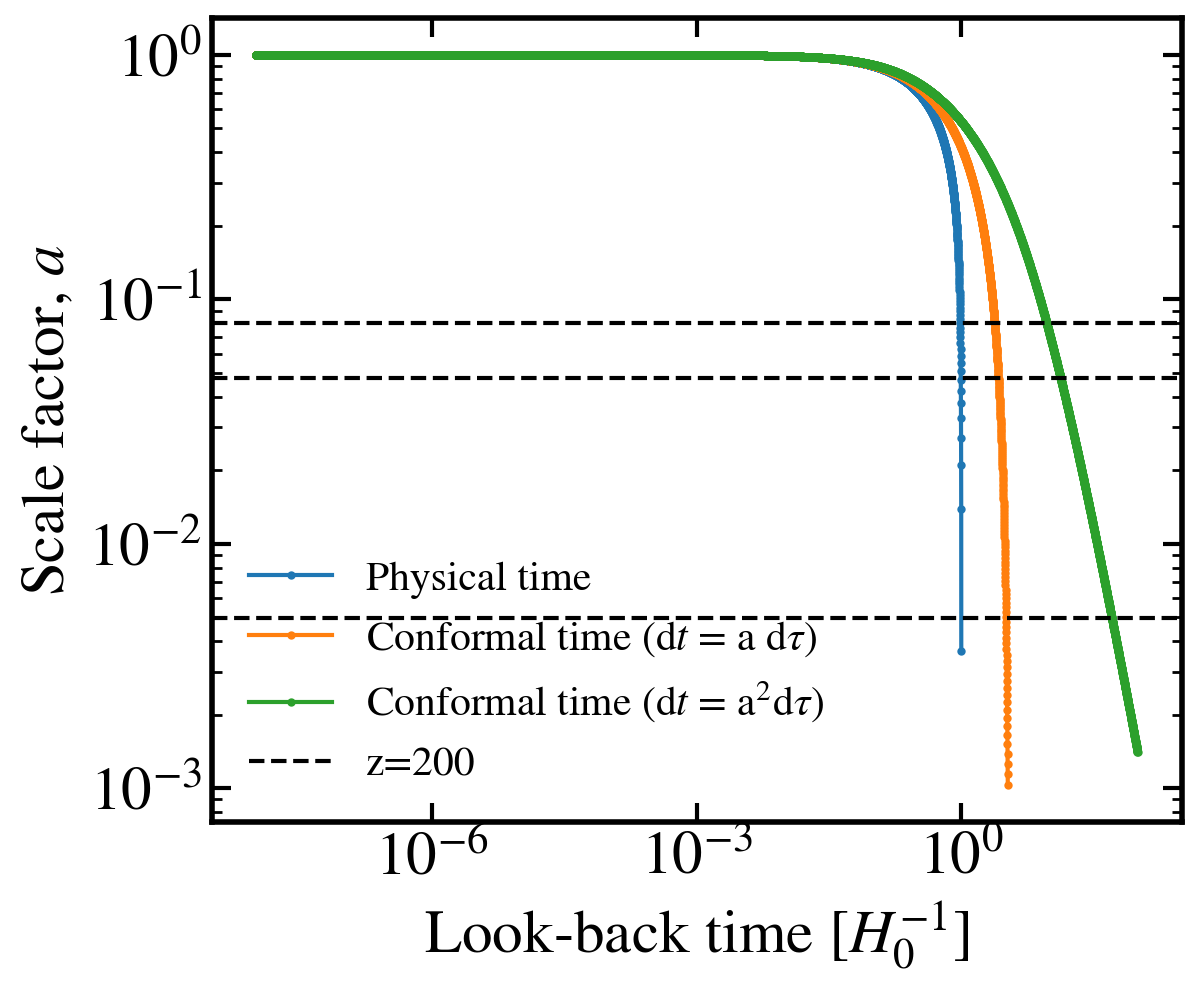

In [15]:
plt.figure(figsize=(6, 5))
plt.plot(t, at, "o-", ms=2, label=r"Physical time ")
plt.plot(tau0, atau0, "o-", ms=2, label=r"Conformal time (d$t$ = a d$\tau$)")
plt.plot(tau1, atau1, "o-", ms=2, label=r"Conformal time (d$t$ = a$^2$d$\tau$)")

plt.axhline(1/201, ls="--", c='k', label="z=200")
plt.axhline(1/12.5, ls="--", c='k')#, label="z=200")
plt.axhline(1/21, ls="--", c='k')#, label="z=200")

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"Look-back time [$H_0^{-1}$]")
plt.ylabel("Scale factor, $a$")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

<IPython.core.display.Javascript object>


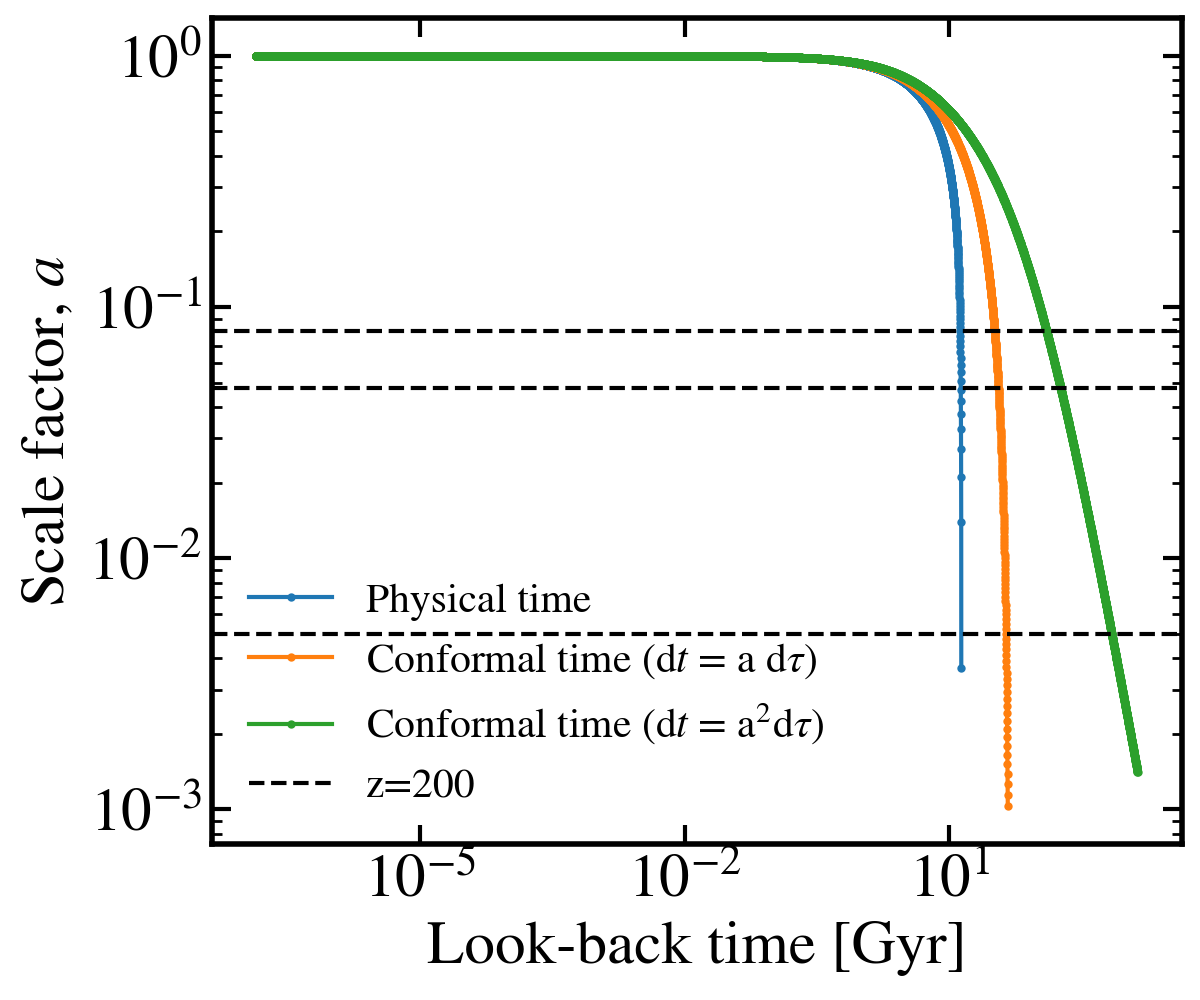

In [16]:
plt.figure(figsize=(6, 5))
plt.plot(t*unit_t, at, "o-", ms=2, label=r"Physical time ")
plt.plot(tau0*unit_t, atau0, "o-", ms=2, label=r"Conformal time (d$t$ = a d$\tau$)")
plt.plot(tau1*unit_t, atau1, "o-", ms=2, label=r"Conformal time (d$t$ = a$^2$d$\tau$)")

plt.axhline(1/201, ls="--", c='k', label="z=200")
plt.axhline(1/12.5, ls="--", c='k')#, label="z=200")
plt.axhline(1/21, ls="--", c='k')#, label="z=200")

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"Look-back time [Gyr]")
plt.ylabel("Scale factor, $a$")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

# Interpolate

I am going to use `np.interp`, and its `xp` must be increasing.

```
Signature: np.interp(x, xp, fp, left=None, right=None, period=None)
Docstring:
One-dimensional linear interpolation.

Returns the one-dimensional piecewise linear interpolant to a function
with given discrete data points (`xp`, `fp`), evaluated at `x`.

Parameters
----------
x : array_like
    The x-coordinates at which to evaluate the interpolated values.

xp : 1-D sequence of floats
    The x-coordinates of the data points, must be increasing if argument
    `period` is not specified. Otherwise, `xp` is internally sorted after
    normalizing the periodic boundaries with ``xp = xp % period``.

fp : 1-D sequence of float or complex
    The y-coordinates of the data points, same length as `xp`.

left : optional float or complex corresponding to fp
    Value to return for `x < xp[0]`, default is `fp[0]`.

right : optional float or complex corresponding to fp
    Value to return for `x > xp[-1]`, default is `fp[-1]`.

period : None or float, optional
    A period for the x-coordinates. This parameter allows the proper
    interpolation of angular x-coordinates. Parameters `left` and `right`
    are ignored if `period` is specified.

    .. versionadded:: 1.10.0

Returns
-------
y : float or complex (corresponding to fp) or ndarray
    The interpolated values, same shape as `x`.
```

<IPython.core.display.Javascript object>


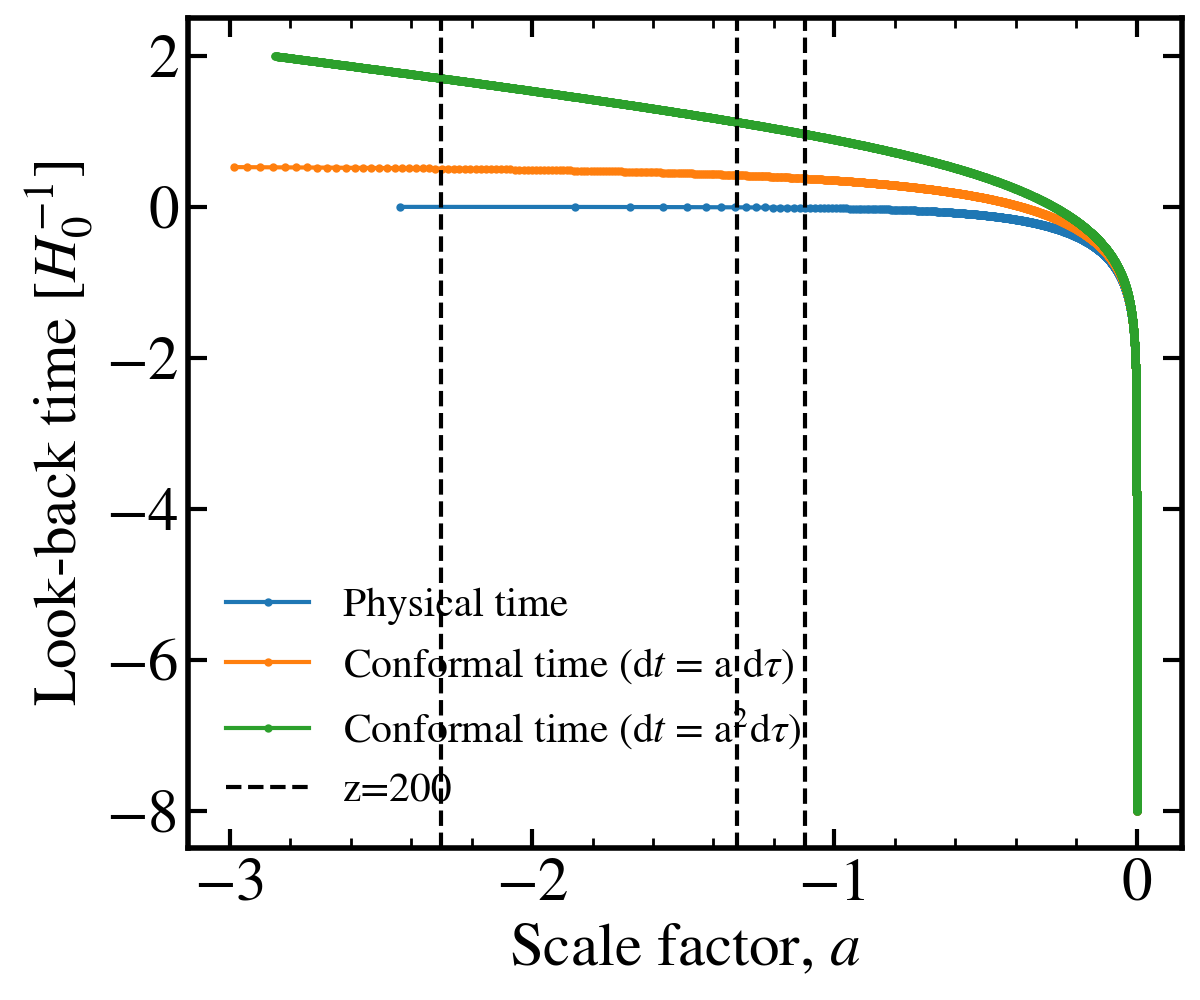

In [17]:
plt.figure(figsize=(6, 5))
plt.plot(np.log10(at), np.log10(t), "o-", ms=2, label=r"Physical time ")
plt.plot(np.log10(atau0), np.log10(tau0), "o-", ms=2, label=r"Conformal time (d$t$ = a d$\tau$)")
plt.plot(np.log10(atau1), np.log10(tau1), "o-", ms=2, label=r"Conformal time (d$t$ = a$^2$d$\tau$)")

plt.axvline(np.log10(1/201), ls="--", c='k', label="z=200")
plt.axvline(np.log10(1/12.5), ls="--", c='k')#, label="z=200")
plt.axvline(np.log10(1/21), ls="--", c='k')#, label="z=200")

# plt.xscale('log')
# plt.yscale('log')

plt.xlabel("Scale factor, $a$")
plt.ylabel(r"Look-back time [$H_0^{-1}$]")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

Here, `xp` is scale factor (a) and `fp` is `lookback time`.

In [18]:
def is_monotonic(arr):
    
    is_increasing = np.all(np.diff(arr[~np.isnan(arr)]) > 0)
    is_decreasing = np.all(np.diff(arr[~np.isnan(arr)]) < 0)
    
    if is_increasing:
        return "Increasing"
    elif is_decreasing:
        return "Decreasing"
    else:
        return "Not Monotonic"

In [19]:
name_vars = ['t', 'tau0', 'tau1', 'at', 'atau0', 'atau1']
check_vars = [t, tau0, tau1, at, atau0, atau1]
for i, var in enumerate(check_vars):
    print(f"{name_vars[i]:10} {is_monotonic(var)}")

t          Increasing
tau0       Increasing
tau1       Increasing
at         Decreasing
atau0      Decreasing
atau1      Decreasing


In [20]:
is_monotonic(atau0[::-1])

'Increasing'

In [21]:
t_itp = np.interp(atau0, at[::-1], t[::-1])
tau1_itp = np.interp(atau0, atau1[::-1], tau1[::-1])

lt_itp = np.interp(np.log10(atau0), np.log10(at[::-1]), np.log10(t[::-1]))
ltau1_itp = np.interp(np.log10(atau0), np.log10(atau1[::-1]), np.log10(tau1[::-1]))

In [22]:
# t_itp = np.interp(atau0, at[~np.isnan(at)], t[~np.isnan(at)])
# tau1_itp = np.interp(atau0, atau1[~np.isnan(atau1)], tau1[~np.isnan(atau1)])

# lt_itp = np.interp(np.log10(atau0), np.log10(at[~np.isnan(at)]), np.log10(t[~np.isnan(at)]))
# ltau1_itp = np.interp(np.log10(atau0), np.log10(atau1[~np.isnan(atau1)]), np.log10(tau1[~np.isnan(atau1)]))

<IPython.core.display.Javascript object>


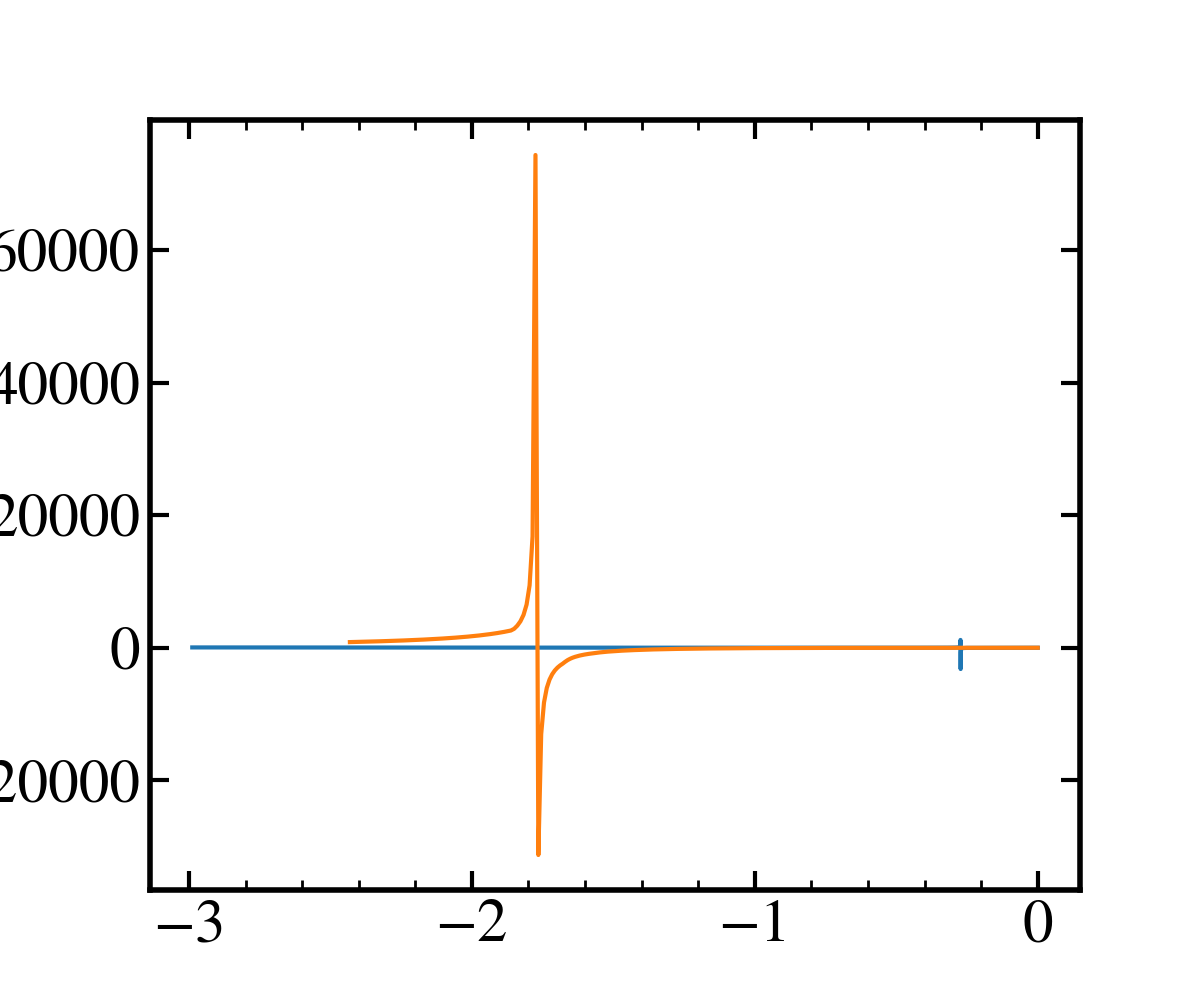

In [23]:
plt.figure(figsize=(6, 5))

plt.plot(np.log10(atau0), tau1_itp / ltau1_itp)
plt.plot(np.log10(atau0), t_itp / lt_itp)

<IPython.core.display.Javascript object>


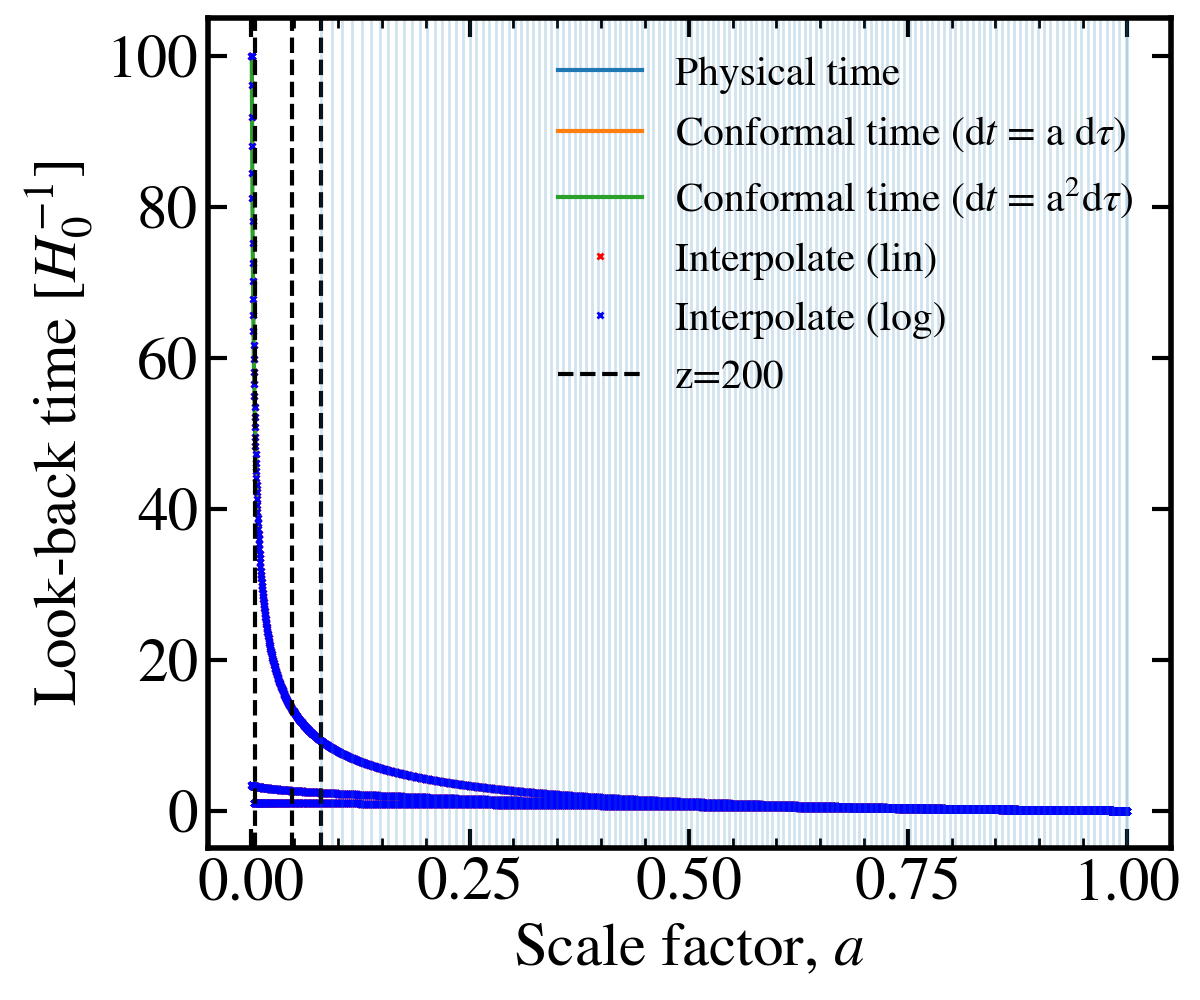

In [24]:
plt.figure(figsize=(6, 5))
plt.plot(at, t, label=r"Physical time ")
plt.plot(atau0, tau0, label=r"Conformal time (d$t$ = a d$\tau$)")
plt.plot(atau1, tau1, label=r"Conformal time (d$t$ = a$^2$d$\tau$)")

plt.plot(atau0, t_itp, "x", ms=2, c='r', label=r"Interpolate (lin)")
plt.plot(atau0, tau0, "x", ms=2, c='r')
plt.plot(atau0, tau1_itp, "x", ms=2, c='r')

plt.plot(atau0, 10**lt_itp, "x", ms=2, c='b', label=r"Interpolate (log)")
plt.plot(atau0, tau0, "x", ms=2, c='b')
plt.plot(atau0, 10**ltau1_itp, "x", ms=2, c='b')

plt.axvline(1/201, ls="--", c='k', label="z=200")
plt.axvline(1/12.5, ls="--", c='k')#, label="z=200")
plt.axvline(1/21, ls="--", c='k')#, label="z=200")

for aout in aout_nbody:
    plt.axvline(aout, lw=1, alpha=0.2)
    
# plt.xscale('log')
# plt.yscale('log')

plt.xlabel("Scale factor, $a$")
plt.ylabel(r"Look-back time [$H_0^{-1}$]")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

In [25]:
table_itp = {
    "t": t_itp,
    "tau0": tau0,
    "tau1": tau1_itp,
    "a": atau0
}

In [26]:
table_itp

{'t': array([1.00000000e-08, 1.00200520e-08, 1.00401445e-08, ...,
                   nan,            nan,            nan]),
 'tau0': array([1.00000000e-08, 1.00200522e-08, 1.00401446e-08, ...,
        4.98000795e+00, 4.98999396e+00, 5.00000000e+00]),
 'tau1': array([1.00000000e-08, 1.00200521e-08, 1.00401446e-08, ...,
                   nan,            nan,            nan]),
 'a': array([ 1.,  1.,  1., ..., nan, nan, nan])}

In [27]:
table = pd.DataFrame(table_itp)

In [28]:
table

,t,tau0,tau1,a
0,1.000000e-08,1.000000e-08,1.000000e-08,1.0
1,1.002005e-08,1.002005e-08,1.002005e-08,1.0
2,1.004014e-08,1.004014e-08,1.004014e-08,1.0
3,1.006028e-08,1.006028e-08,1.006028e-08,1.0
4,1.008045e-08,1.008045e-08,1.008045e-08,1.0
...,...,...,...,...
9995,NaN,4.960096e+00,NaN,NaN
9996,NaN,4.970042e+00,NaN,NaN
9997,NaN,4.980008e+00,NaN,NaN
9998,NaN,4.989994e+00,NaN,NaN


In [29]:
plus_w0 = '+' if w0 >= 0 else ''
plus_wa = '+' if wa >= 0 else ''
fname = f"time_table_cpl{plus_w0}{w0:.1f}{plus_wa}{wa:.1f}.csv"
print(fname)

time_table_cpl-1.0+0.0.csv


In [30]:
notes = [
    "# Cosmological Table\n",
    f"# w0={w0}, wa={wa}\n",
    f"# H0={h*100}, Omega_m={Omega_m}, Omega_l={Omega_l}, Omega_k={Omega_k}\n",
    "# Columns: t, tau0, tau1, a\n"
]

In [31]:
with open(fname, "w") as f:
    for note in notes:
        f.write(note)
    table.to_csv(f, index=False, header=False)

In [32]:
with open(fname, "r") as f:
    lines = f.readlines()

In [33]:
lines # for check

['# Cosmological Table\n',
 '# w0=-1.0, wa=0.0\n',
 '# H0=72.0, Omega_m=0.26, Omega_l=0.74, Omega_k=0\n',
 '# Columns: t, tau0, tau1, a\n',
 '1e-08,1e-08,1e-08,1.0\n',
 '1.0020052006350778e-08,1.002005219956829e-08,1.0020052088178002e-08,0.9999999999799479\n',
 '1.0040144473771554e-08,1.0040144608207333e-08,1.0040144567904002e-08,0.9999999999598554\n',
 '1.006027714851071e-08,1.0060277306545179e-08,1.0060277291807674e-08,0.9999999999397228\n',
 '1.008045025950682e-08,1.0080450375371498e-08,1.0080450397133504e-08,0.9999999999195497\n',
 '1.0100663745998969e-08,1.0100663895638016e-08,1.0100663872105795e-08,0.9999999998993362\n',
 '1.0120917773720155e-08,1.0120917948458772e-08,1.0120917878541316e-08,0.9999999998790822\n',
 '1.0141212384181934e-08,1.014121261511045e-08,1.0141212535032607e-08,0.9999999998587875\n',
 '1.0161547768519637e-08,1.0161547977032736e-08,1.0161547962165991e-08,0.9999999998384521\n',
 '1.0181923925322538e-08,1.0181924115828556e-08,1.0181924080201866e-08,0.99999999981